In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [6]:
data =pd.read_csv("Titanic-Dataset.csv")

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.dropna(subset="Age", inplace=True)

In [10]:
data.dropna(subset="Embarked", inplace=True)

In [12]:
data.drop(["Cabin"], inplace=True, axis=1)

In [13]:
data.drop(["Name", "Ticket"], inplace=True, axis=1)

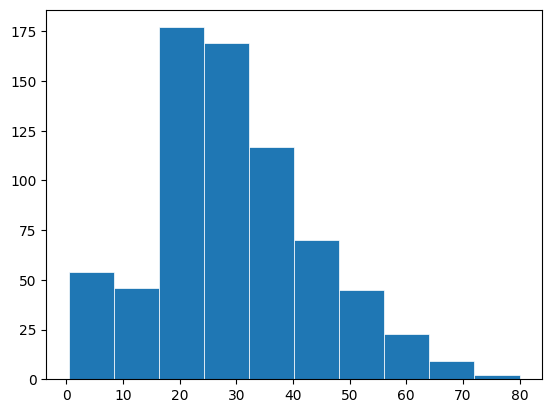

In [14]:
# plot:
fig, ax = plt.subplots()

ax.hist(data["Age"], bins=10, linewidth=0.5, edgecolor="white")

plt.show()

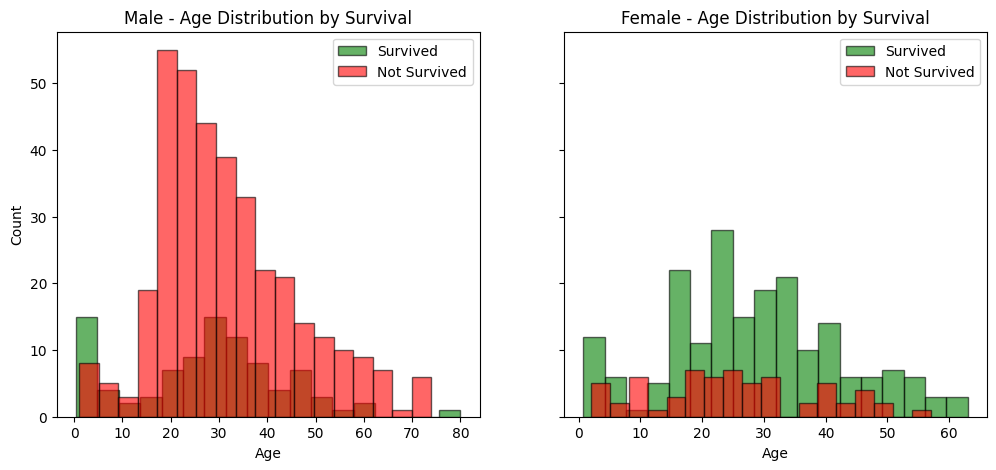

In [15]:
# Plot Histogram
# Create a figure with two subplots (one for each sex)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for Male
axes[0].hist(data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Age'], bins=18, alpha=0.6, color='green', edgecolor='black', label="Survived")
axes[0].hist(data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Age'], bins=18, alpha=0.6, color='red', edgecolor='black', label="Not Survived")
axes[0].set_title("Male - Age Distribution by Survival")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].legend()

# Plot for Female
axes[1].hist(data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Age'], bins=18, alpha=0.6, color='green', edgecolor='black', label="Survived")
axes[1].hist(data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Age'], bins=18, alpha=0.6, color='red', edgecolor='black', label="Not Survived")
axes[1].set_title("Female - Age Distribution by Survival")
axes[1].set_xlabel("Age")
axes[1].legend()

# Show the plot
plt.show()

In [16]:
# Encoding categorical data, converting object to numerical format
encoder=LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
5,6,0,3,1,NaN,0,0,8.4583,1
6,7,0,1,1,54.0,0,0,51.8625,2
7,8,0,3,1,2.0,3,1,21.0750,2
8,9,1,3,0,27.0,0,2,11.1333,2
9,10,1,2,0,14.0,1,0,30.0708,0


In [17]:
survival_table = pd.crosstab(data['Pclass'], data['Survived'], normalize='index') * 100
survival_table.rename(columns={0: 'Died(%)', 1: 'Survived(%)'}, inplace=True)
print(survival_table)


Survived    Died(%)  Survived(%)
Pclass                          
1         37.383178    62.616822
2         52.717391    47.282609
3         75.763747    24.236253


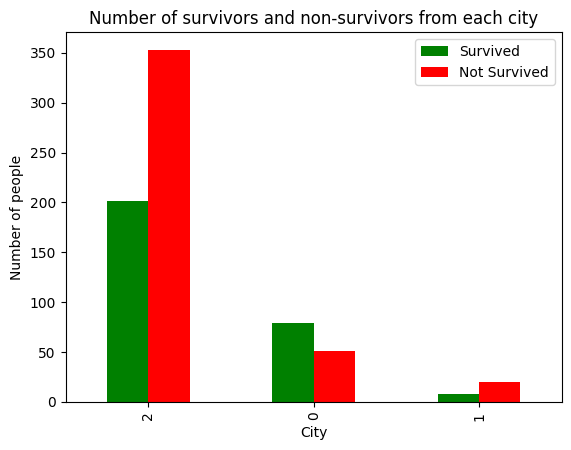

In [23]:
survivors = data[data['Survived'] == 1]['Embarked'].value_counts()
non_survivors = data[data['Survived'] == 0]['Embarked'].value_counts()

plot_df = pd.DataFrame({'Survived': survivors, 'Not Survived': non_survivors})

plot_df.plot(kind='bar', stacked=False, color=['g', 'r'])

plt.xlabel('City')
plt.ylabel('Number of people')
plt.title('Number of survivors and non-survivors from each city')

plt.show()

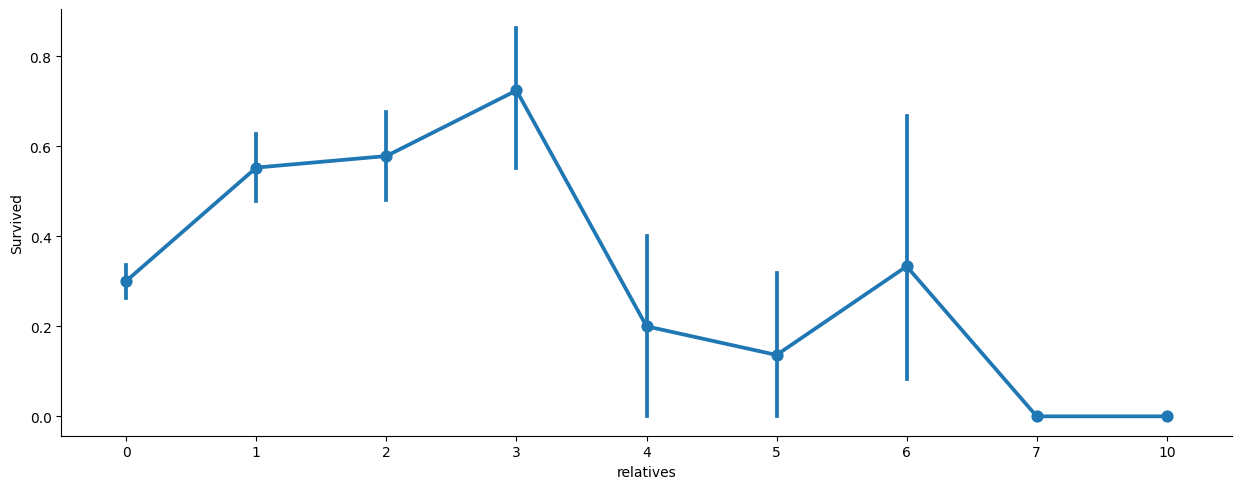

In [18]:
data['relatives'] = data['SibSp'] + data['Parch']

axes = sns.catplot(x='relatives', y='Survived', data=data, aspect=2.5, kind='point')
plt.show()

# Model Implementation

### Calculate Enthropy for entire dataset

In [19]:
def calculate_entropy(column):
    """
    Manually compute entropy for a categorical column.#Model Implementation
    """
    value_counts = column.value_counts()  # Count occurrences of each category
    total_count = len(column)  # Total number of values

    entropy_value = 0
    for count in value_counts:
        probability = count / total_count  # Compute probability p(x)
        entropy_value += -probability * np.log2(probability)  # Apply entropy formula

    return entropy_value



In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)
train_entropy = calculate_entropy(train['Survived'])
print(f"Entropy of the 'Survived' column in Training Data: {train_entropy}")

Entropy of the 'Survived' column in Training Data: 0.9588524948265187


### Function to calculate information gain for categorical data

In [42]:
def information_gain(train, attribute_name, target_name="Survived"):
    train_entropy = calculate_entropy(train[target_name])
    total_count = len(train)
    entropy_of_attribute_given_value = 0

    for value in train[attribute_name].unique():
        subset = train[train[attribute_name] == value]
        entropy_value = calculate_entropy(subset[target_name]) if len(subset) > 0 else 0
        weight = len(subset) / total_count
        entropy_of_attribute_given_value += entropy_value * weight

    return train_entropy - entropy_of_attribute_given_value

In [43]:
information_gain(train, 'Pclass')

0.08074639752730972

In [44]:
gains = pd.DataFrame(columns=['Attribute', 'Information Gain', "value"])
categorial_columns = ['Pclass', 'Sex', 'Embarked']
for column in categorial_columns:
    gains.loc[len(gains)] = [column, information_gain(train, column), '']
gains.head()

,Attribute,Information Gain,value
0,Pclass,0.080746,
1,Sex,0.208103,
2,Embarked,0.022501,


### Function to calculate continous data


In [45]:
def numerical_information_gain(data, split_attribute_name, target_name="Survived"):
    data = data.sort_values(split_attribute_name)
    values = data[split_attribute_name].unique()
    max_gain = 0
    split_value = 0

    for i in range(1, len(values)):
        value = (values[i] + values[i - 1]) / 2
        data.loc[:, "temp"] = data[split_attribute_name] > value
        gain = information_gain(data, "temp", target_name)
        
        if gain > max_gain:
            max_gain = gain
            split_value = value

    return max_gain, split_value

In [46]:
categorial_columns = ["Pclass", "Sex", "Embarked"]
numerical_columns = ["Age", "Fare"]

In [ ]:
def select_best_features(df):
    gains_df = pd.DataFrame(columns=["Attribute", "Information Gain", "Value"])

    for column in categorial_columns:
        gains_df.loc[len(gains_df)] = [column, information_gain(df, column, "Survived"), ""]

    for column in numerical_columns:
        gain, value = numerical_information_gain(df, column, "Survived")
        gains_df.loc[len(gains_df)] = [column, gain, value]

    gains_df.sort_values("Information Gain", ascending=False, inplace=True)
    return gains_df.head()

,Attribute,Information Gain,value
1,Sex,0.208103,
0,Pclass,0.080746,
4,Fare,0.065487,9.83335
5,relatives,0.023422,0.5
2,Embarked,0.022501,


In [31]:
females = train[train['Sex'] == 0]
males = train[train["Sex"] == 1]

In [35]:
def select_best_features(df):
    gains_df = pd.DataFrame(columns=['Attribute', 'Information Gain', "value"])
    for column in categorial_columns:
        gains_df.loc[len(gains_df)] = [column, information_gain(df, column), '']
    for column in numerical_columns:
        gain, value = numerical_information_gain(df, column)
        gains_df.loc[len(gains_df)] = [column, gain, value]
    gains_df.sort_values('Information Gain', ascending=False, inplace=True)
    return gains_df.head()

In [36]:
select_best_features(males)

Information gain for attribute  0.038194438664593267
Information gain for attribute  0.0
Information gain for attribute  0.01644130611206407
Information gain for attribute  0.0015020202076625466
Information gain for attribute  0.0008768906683336297
Information gain for attribute  0.00042497361655624566
Information gain for attribute  0.0001381213065148046
Information gain for attribute  9.756585924391992e-05
Information gain for attribute  0.00014332200896483016
Information gain for attribute  0.001338589300350912
Information gain for attribute  0.0014708679877870612
Information gain for attribute  0.002145135476774751
Information gain for attribute  0.0017777716163409618
Information gain for attribute  0.0023027702023254992
Information gain for attribute  0.0035355295040588874
Information gain for attribute  0.0032959852551313062
Information gain for attribute  0.0037254554685910435
Information gain for attribute  0.004718356627526177
Information gain for attribute  0.0041773530859914

,Attribute,Information Gain,value
4,Fare,0.041648,26.26875
0,Pclass,0.038194,
2,Embarked,0.016441,
5,relatives,0.010458,0.5
3,Age,0.004978,77.0


In [37]:
select_best_features(females)

Information gain for attribute  0.22702469850309104
Information gain for attribute  0.0
Information gain for attribute  0.0361115962053562
Information gain for attribute  0.007375673426181617
Information gain for attribute  0.005574508560328262
Information gain for attribute  0.008328371339228258
Information gain for attribute  0.009860270946521199
Information gain for attribute  0.006975338392379404
Information gain for attribute  0.0046575774238523104
Information gain for attribute  0.005839989327238615
Information gain for attribute  0.007133782264800881
Information gain for attribute  0.012107130123233167
Information gain for attribute  0.015039706419429644
Information gain for attribute  0.018261842694042518
Information gain for attribute  0.016952467282908112
Information gain for attribute  0.018964677044417177
Information gain for attribute  0.015193633430958142
Information gain for attribute  0.010916829813405249
Information gain for attribute  0.010613742304952933
Information 

,Attribute,Information Gain,value
0,Pclass,0.227025,
5,relatives,0.105916,3.5
4,Fare,0.090360,70.275
2,Embarked,0.036112,
3,Age,0.018965,14.5


In [38]:
select_best_features(females)
pclass_1 = females[females['Pclass'] == 1]
pclass_2 = females[females['Pclass'] == 2]
pclass_3 = females[females['Pclass'] == 3]

Information gain for attribute  0.22702469850309104
Information gain for attribute  0.0
Information gain for attribute  0.0361115962053562
Information gain for attribute  0.007375673426181617
Information gain for attribute  0.005574508560328262
Information gain for attribute  0.008328371339228258
Information gain for attribute  0.009860270946521199
Information gain for attribute  0.006975338392379404
Information gain for attribute  0.0046575774238523104
Information gain for attribute  0.005839989327238615
Information gain for attribute  0.007133782264800881
Information gain for attribute  0.012107130123233167
Information gain for attribute  0.015039706419429644
Information gain for attribute  0.018261842694042518
Information gain for attribute  0.016952467282908112
Information gain for attribute  0.018964677044417177
Information gain for attribute  0.015193633430958142
Information gain for attribute  0.010916829813405249
Information gain for attribute  0.010613742304952933
Information 

In [39]:
plcass_1_less = pclass_1[pclass_1['relatives'] < 2.5]
plcass_1_more = pclass_1[pclass_1['relatives'] >= 2.5]